# Modelo de Ising

O hamiltoniano do modelo de Ising é dado por:

$H = -\sum_{<ij>} J S_i S_j$

Onde sabemos que $S_i = \pm 1$. A função de partição, por outro lado, é escrita como:

$Z = Tr[e^{-\beta \hat{H}}]$

A probabilidade do sistema mudar de um estado $\sigma$ para um estado $\nu$ é dada por:

$\frac{P_{\sigma}}{P_{\nu}} = \frac{e^{-\beta E_{\sigma}}}{Z} \frac{Z}{e^{-\beta \nu}} = e^{-\beta (E_{\nu} - E_{\sigma})}$

Com isso passa a ser possível o desenvolvimento do algorítmo de Metrópole para resolver o sistema, o qual pode ser enumerado pelas seguintes etapas:

- Sorteiam-se valores aleatorios ($\pm$) para o spin dos diferentes sítios, considerada a configuracao inicial (Sugere-se fazer um sorteio viciado para $S = +1$).

- A partir de uma configuração, sorteia-se um sıtio e trocamos o spin desta posicão.

- Calculamos então a diferenca de energia desta configuracão em relacao à anterior. Podemos notar que a diferenca de energia desta configuracão á dada por: $\Delta E = -4 J \sum_{j} S_j S_i$

- Adotamos então o seguinte procedimento:

    - $E_{new} < E_{old}$, aceita-se a nova configuracão e descartamos a anterior.

    - Caso contrário, sorteia-se um número aleatório, $r$, entre 0 e 1.

    - Caso $r < e^{-\beta \Delta E}$, a configuracão é aceita.

    - Caso contrário, ela é rejeitada.

- Retornamos ao item 2 e o procedimento é repetido por um número suficiente de vezes até que medidas físicas podem ser calculadas como médias das configurações obtidas.

- Convém ignorar as primeiras realizações que começam muito longe da distribuição correta.

In [3]:
import math
import random
import numpy as np
from numba import njit, f8, i8
from ase.units import kB
import matplotlib.pyplot as plt
from scipy.ndimage import convolve, generate_binary_structure

plt.style.use(['science'])
plt.rcParams.update({
    'figure.dpi': 300,
    'text.usetex': True
})

In [4]:
def get_energy(spin):
    kernel = generate_binary_structure(2, 1)
    kernel[1, 1] = False
    energy_array = - spin * convolve(spin, kernel, mode='constant', cval=0)
    energy = energy_array.sum()
    return energy

In [8]:
@njit
def metropole(spin, n_iter, beta_j, energy):
    
    spin = spin.copy()

    spin_evolution = np.zeros(n_iter - 1)
    energy_evolution = np.zeros(n_iter - 1)

    for i in range(0, n_iter - 1):
        random_x = np.random.randint(0, len(spin))
        random_y = np.random.randint(0, len(spin))
        
        initial_spin = spin[random_x, random_y]
        final_spin = -1 * initial_spin

        initial_energy = 0
        final_energy = 0

        if random_x > 0:
            initial_energy += - initial_spin * spin[random_x - 1, random_y]
            final_energy += - final_spin * spin[random_x - 1, random_y]

        elif random_x < (len(spin) - 1):
            initial_energy += - initial_spin * spin[random_x + 1, random_y]
            final_energy += - final_spin * spin[random_x + 1, random_y]

        elif random_y > 0:
            initial_energy += - initial_spin * spin[random_x, random_y - 1]
            final_energy += - final_spin * spin[random_x, random_y - 1]
        
        elif random_y < (len(spin) - 1):
            initial_energy += - initial_spin * spin[random_x, random_y + 1]
            final_energy += - final_spin * spin[random_x, random_y + 1]

        energy_difference = final_energy - initial_energy

        if (energy_difference > 0) * (np.random.random() < np.exp(- beta_j * energy_difference)):
            spin[random_x, random_y] = final_spin
            energy += energy_difference

        elif energy_difference <= 0:
            spin[random_x, random_y] = final_spin
            energy += energy_difference

        spin_evolution[i] = spin.sum()
        energy_evolution[i] = energy

    return spin_evolution[-1], energy_evolution[-1]

In [9]:
n = 50
random_lattice = np.random.random((n, n))

spin_lattice = np.zeros((n, n))
spin_lattice[random_lattice >= 0.75] = 1
spin_lattice[random_lattice < 0.75] = -1

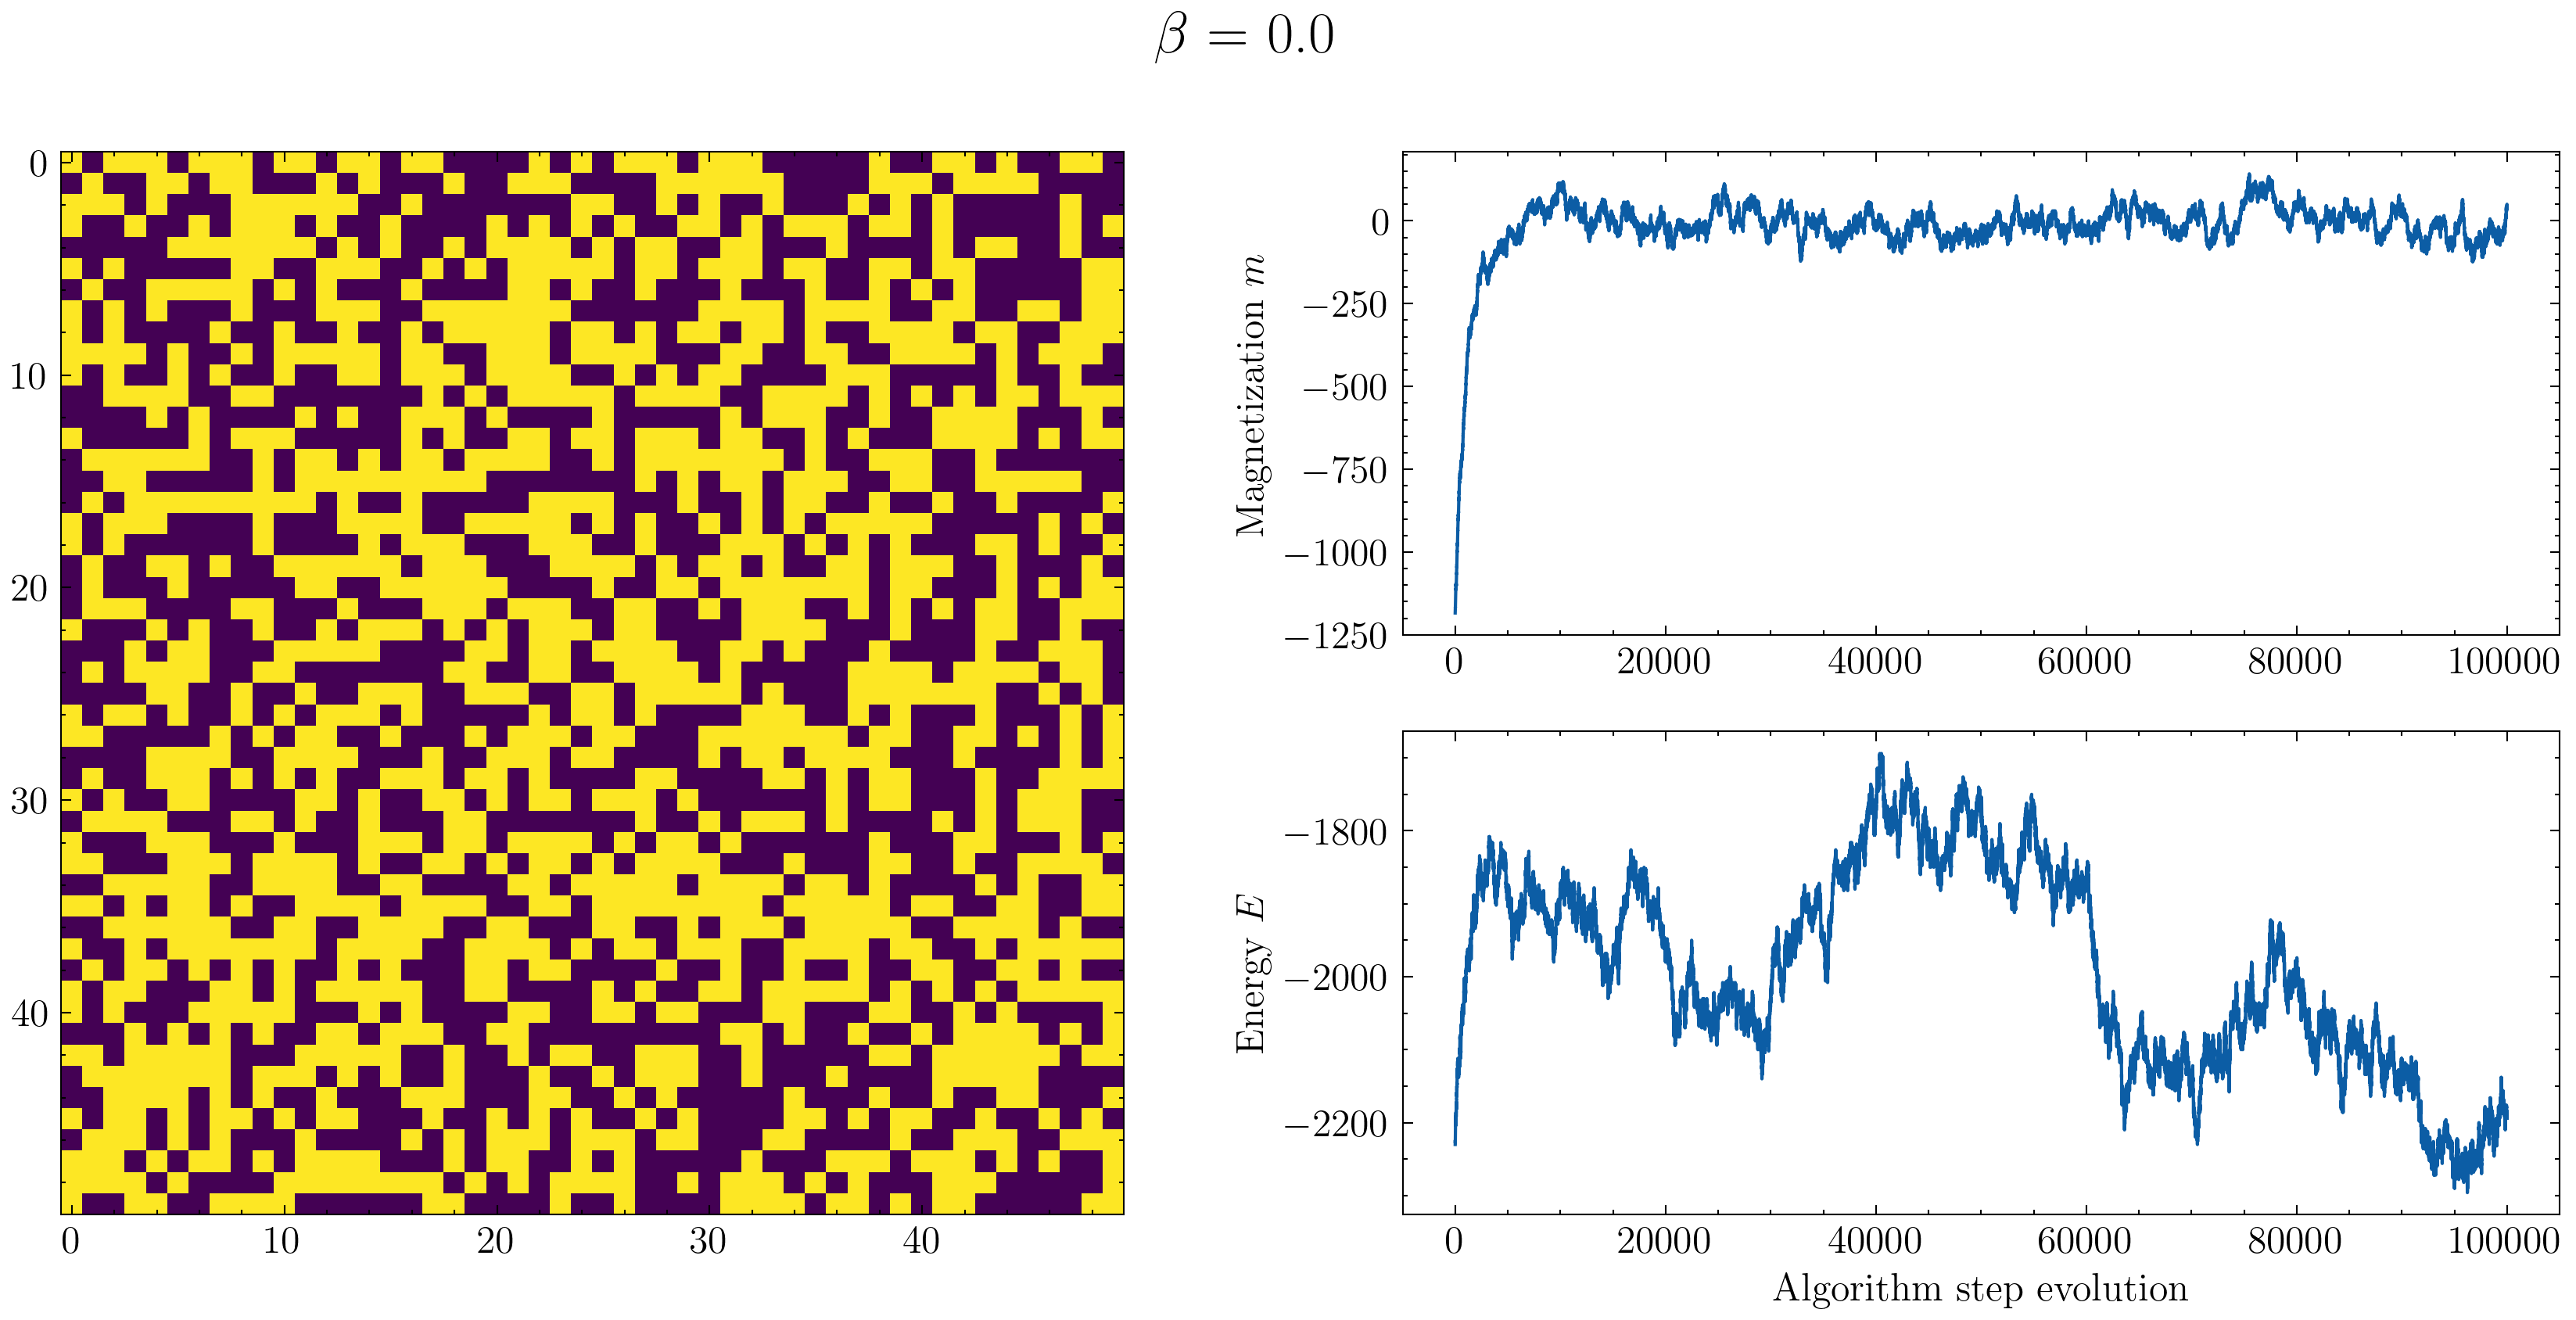

In [106]:
beta = 0.0

spin_matrix, net_spin, net_energy = metropole(spin_lattice, 100000, beta, get_energy(spin_lattice))

fig, ax = plt.subplot_mosaic([['left', 'top_right'], ['left', 'bottom_right']], figsize=(14,6))
fig.suptitle(fr'$\beta$ = {beta}', fontsize=18)

ax['left'].imshow(spin_matrix)

ax['top_right'].plot(net_spin)
ax['top_right'].set_ylabel(r'Magnetization $m$')

ax['bottom_right'].plot(net_energy)
ax['bottom_right'].set_ylabel(r'Energy $E$')
ax['bottom_right'].set_xlabel('Algorithm step evolution')

plt.show()

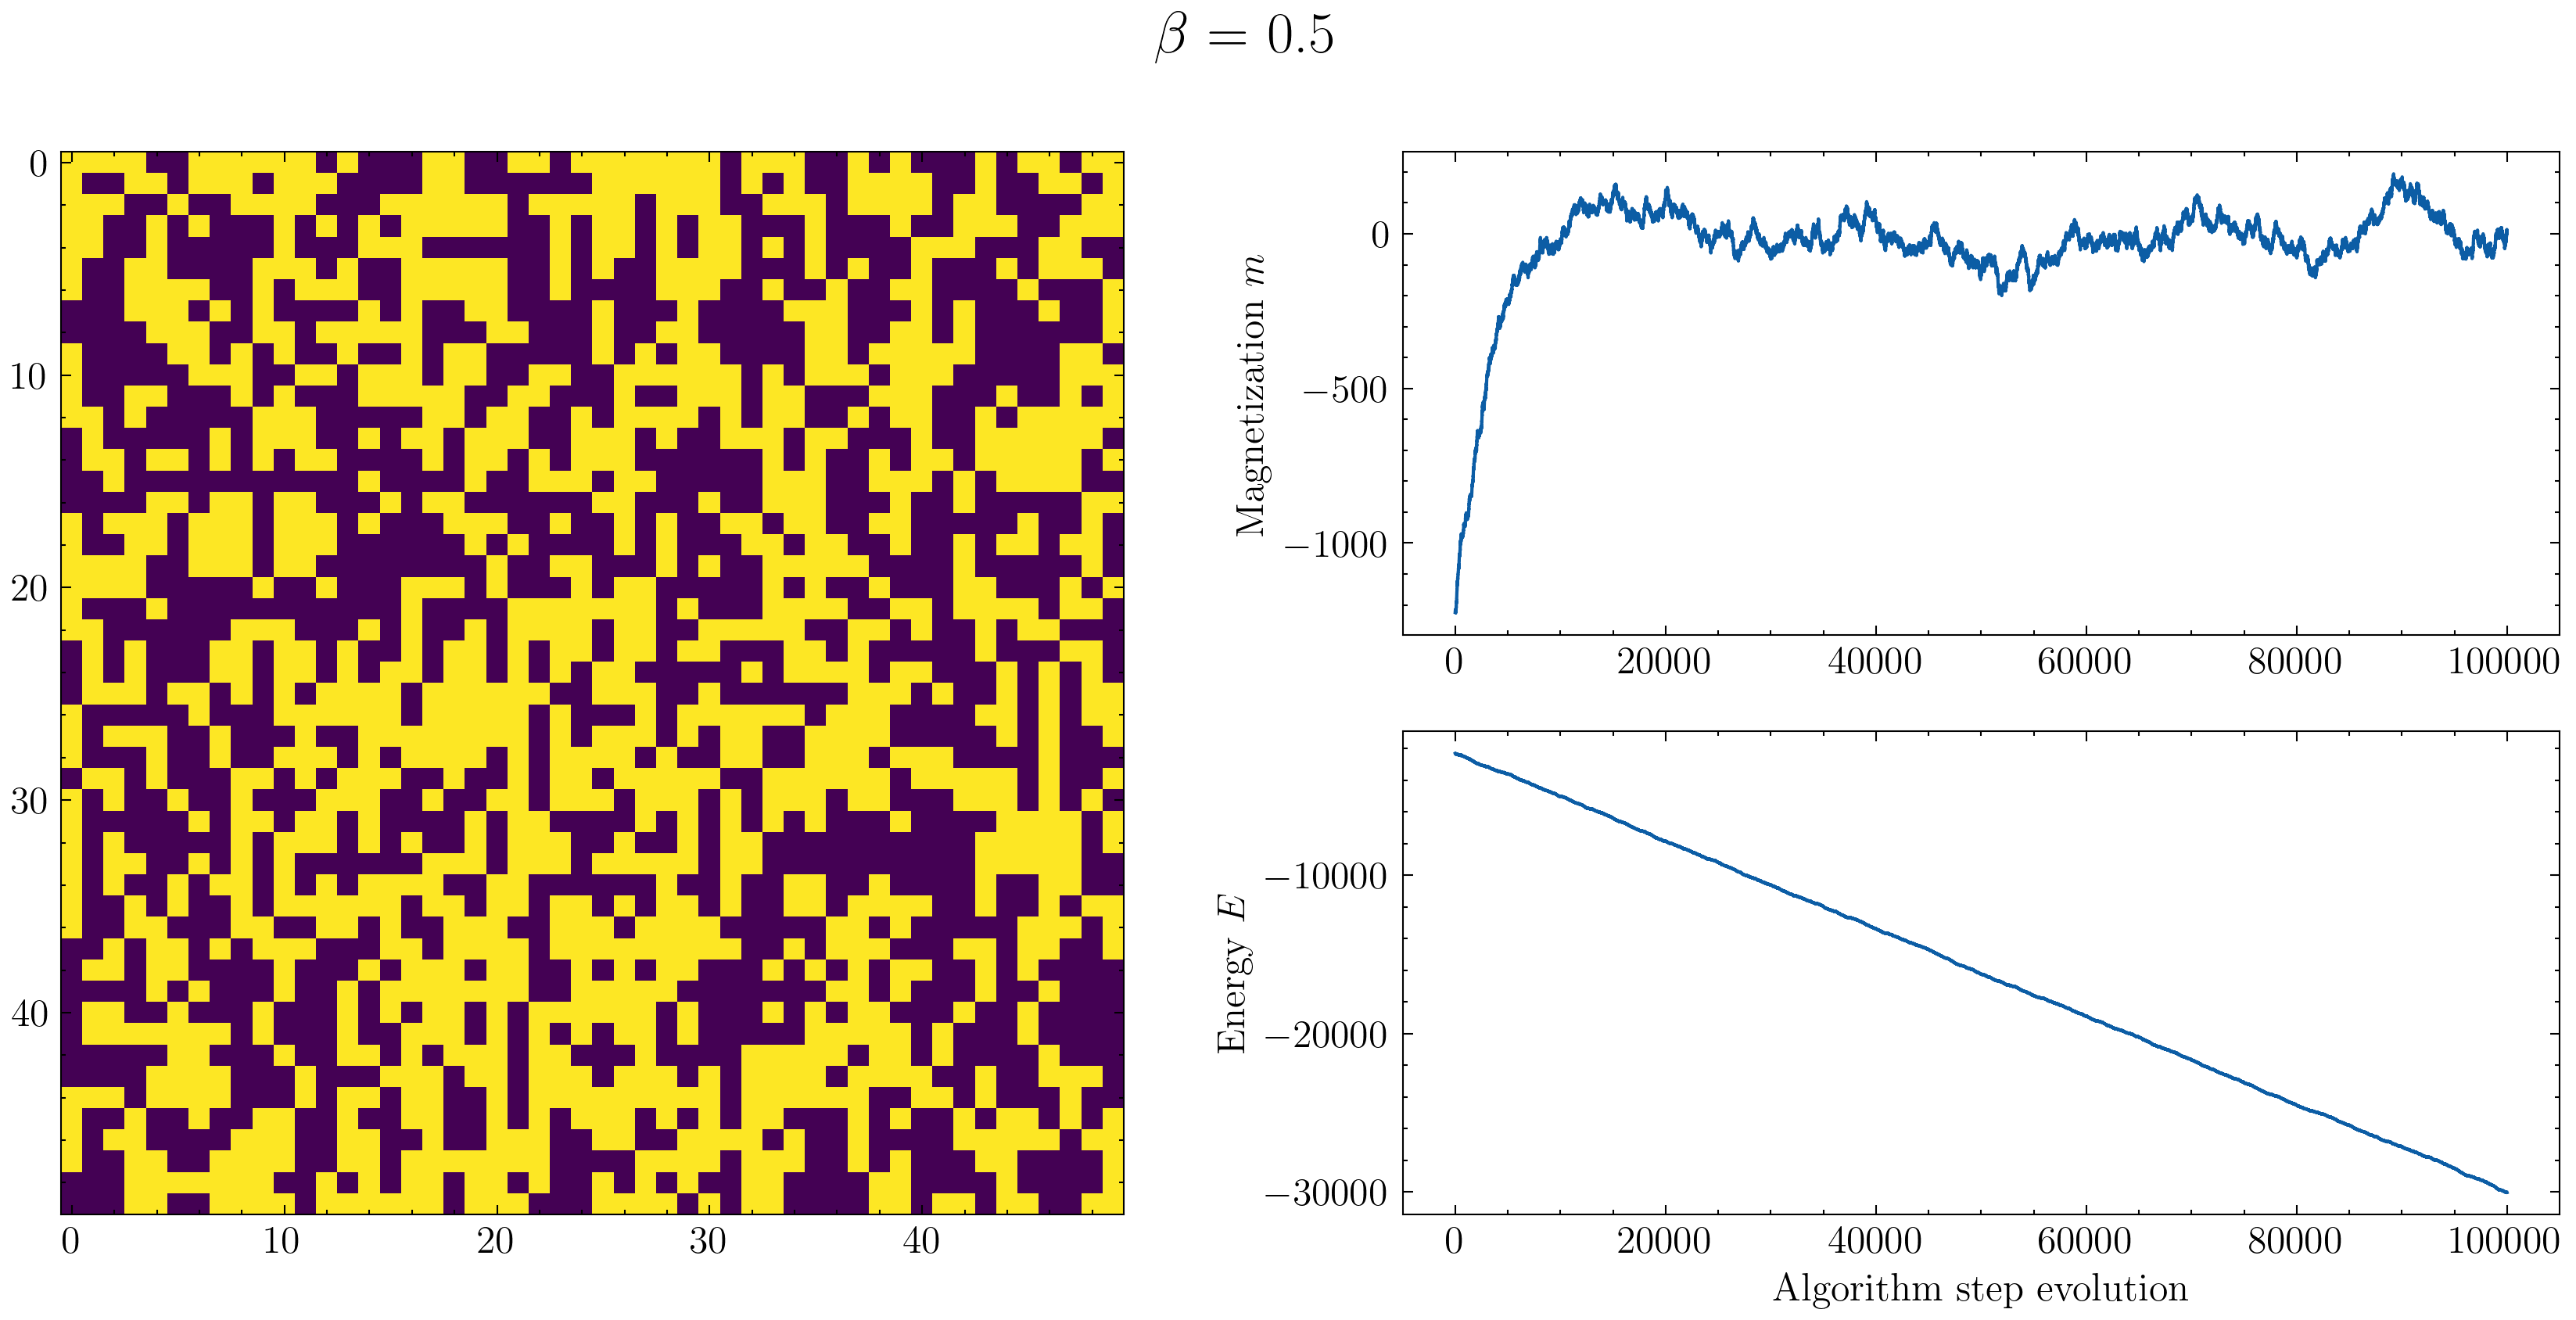

In [108]:
beta = 0.5

spin_matrix, net_spin, net_energy = metropole(spin_lattice, 100000, beta, get_energy(spin_lattice))

fig, ax = plt.subplot_mosaic([['left', 'top_right'], ['left', 'bottom_right']], figsize=(14,6))
fig.suptitle(fr'$\beta$ = {beta}', fontsize=18)

ax['left'].imshow(spin_matrix)

ax['top_right'].plot(net_spin)
ax['top_right'].set_ylabel(r'Magnetization $m$')

ax['bottom_right'].plot(net_energy)
ax['bottom_right'].set_ylabel(r'Energy $E$')
ax['bottom_right'].set_xlabel('Algorithm step evolution')

plt.show()

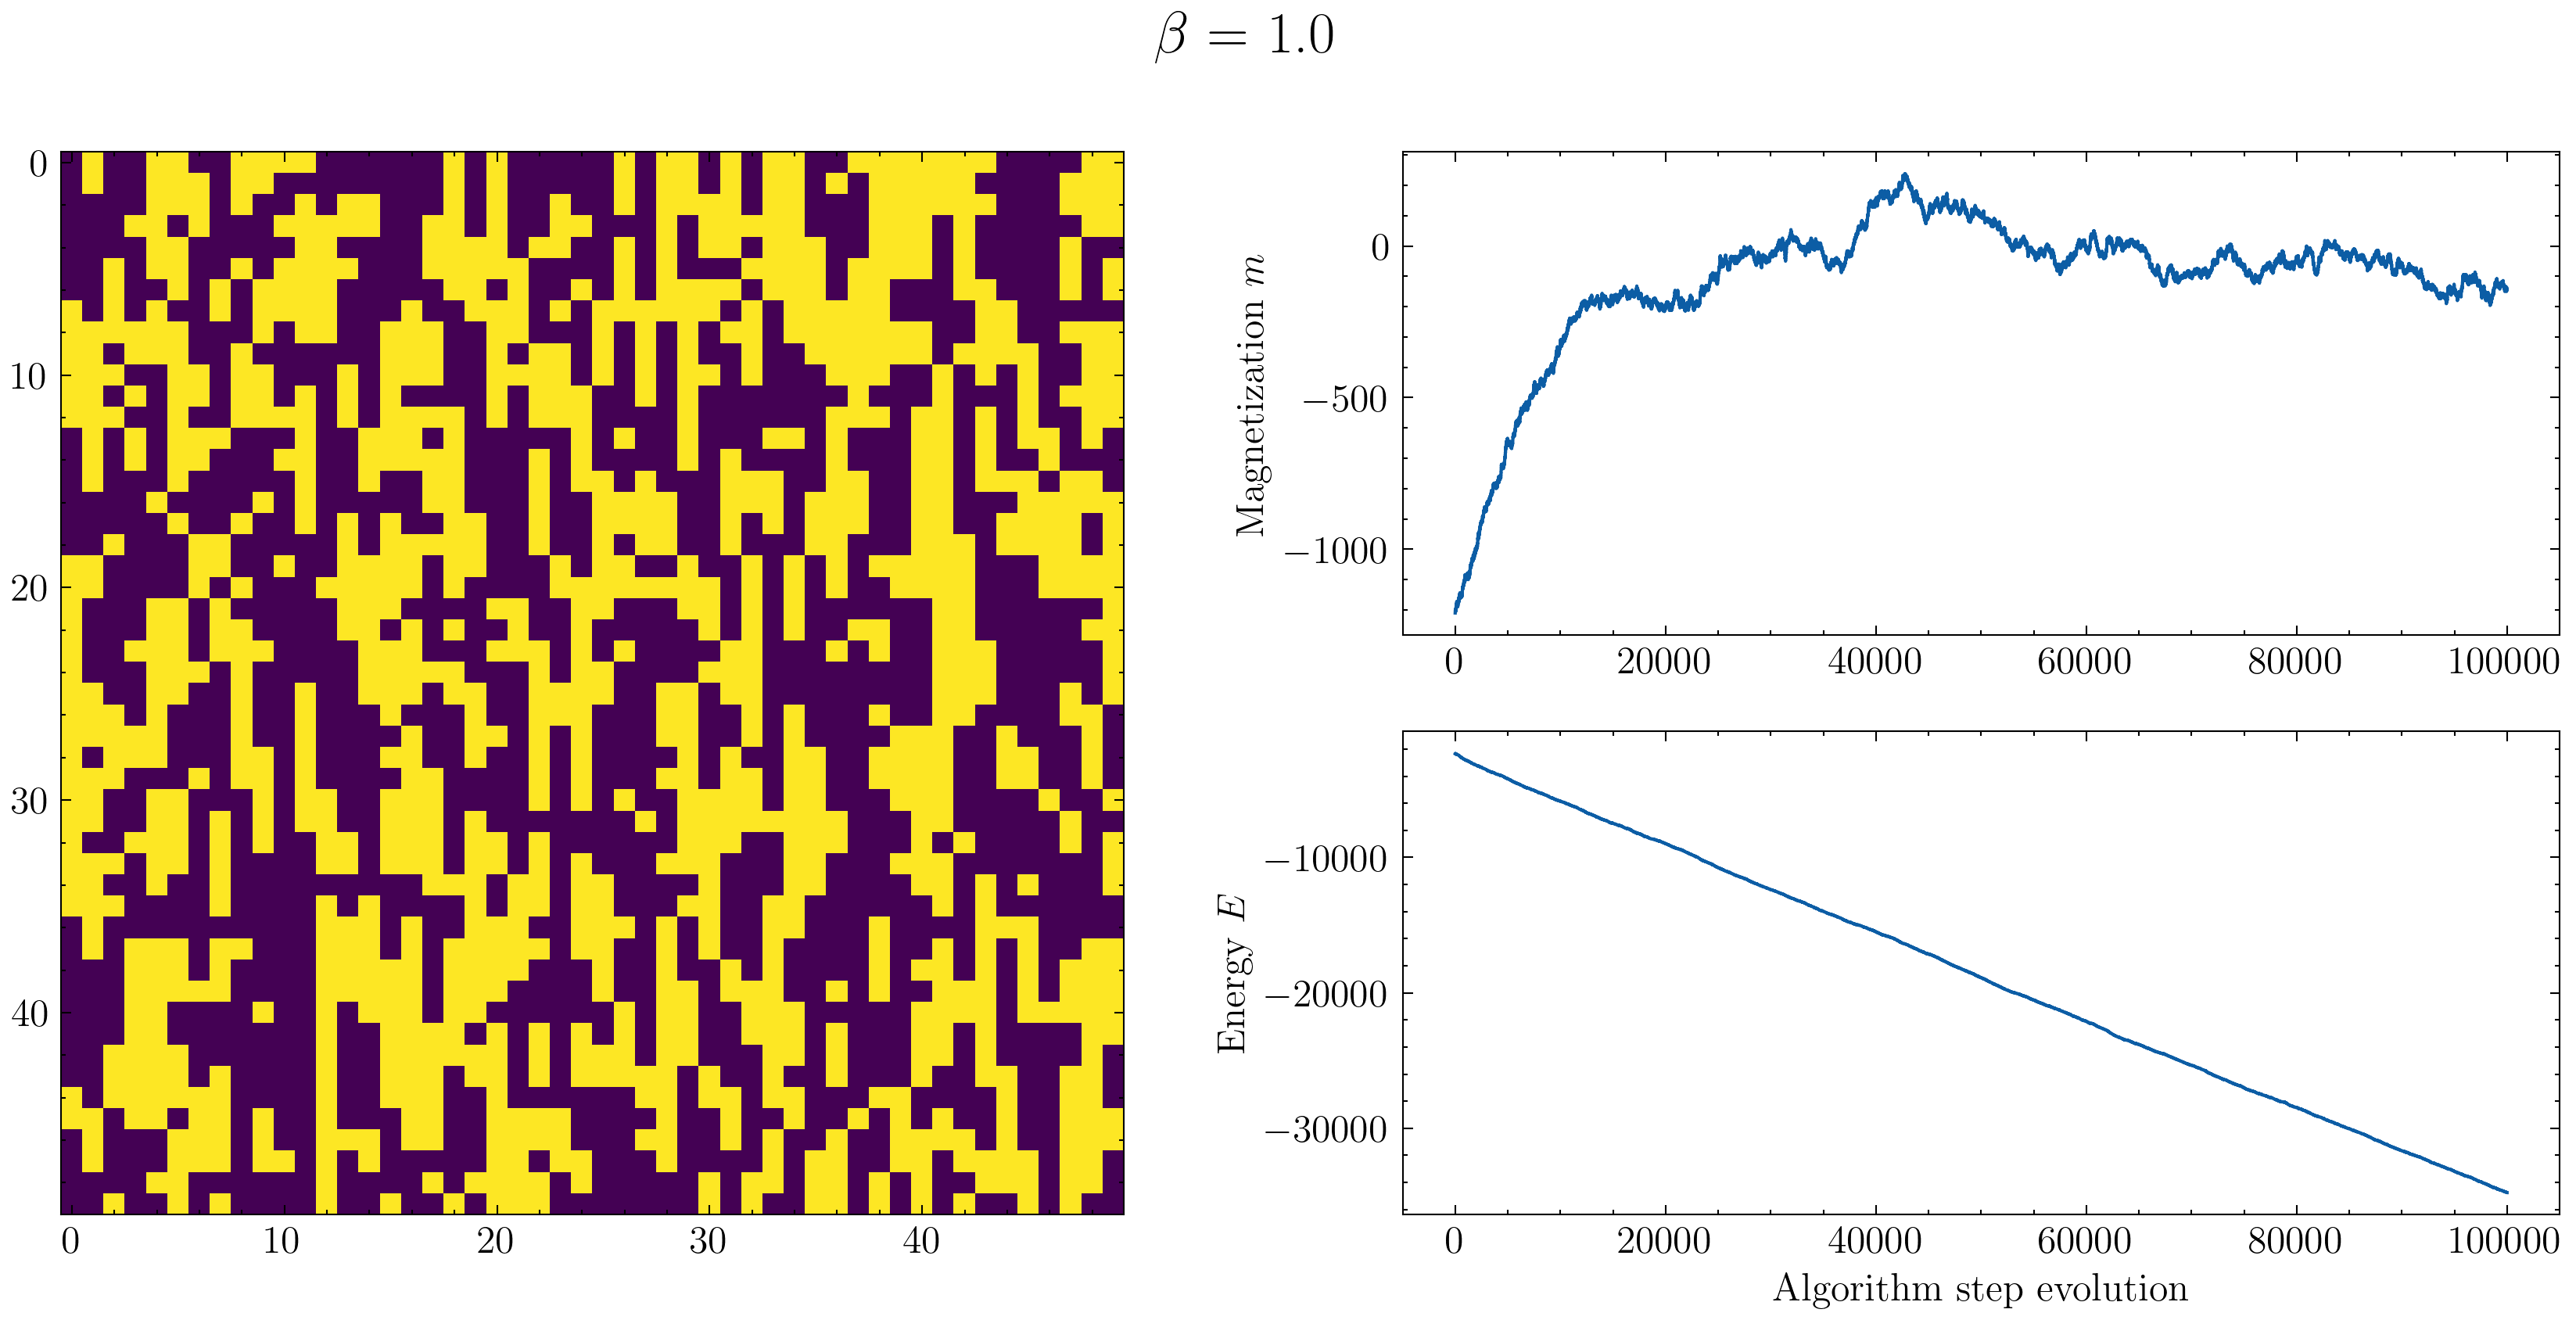

In [110]:
beta = 1.0

spin_matrix, net_spin, net_energy = metropole(spin_lattice, 100000, beta, get_energy(spin_lattice))

fig, ax = plt.subplot_mosaic([['left', 'top_right'], ['left', 'bottom_right']], figsize=(14,6))
fig.suptitle(fr'$\beta$ = {beta}', fontsize=18)

ax['left'].imshow(spin_matrix)

ax['top_right'].plot(net_spin)
ax['top_right'].set_ylabel(r'Magnetization $m$')

ax['bottom_right'].plot(net_energy)
ax['bottom_right'].set_ylabel(r'Energy $E$')
ax['bottom_right'].set_xlabel('Algorithm step evolution')

plt.show()

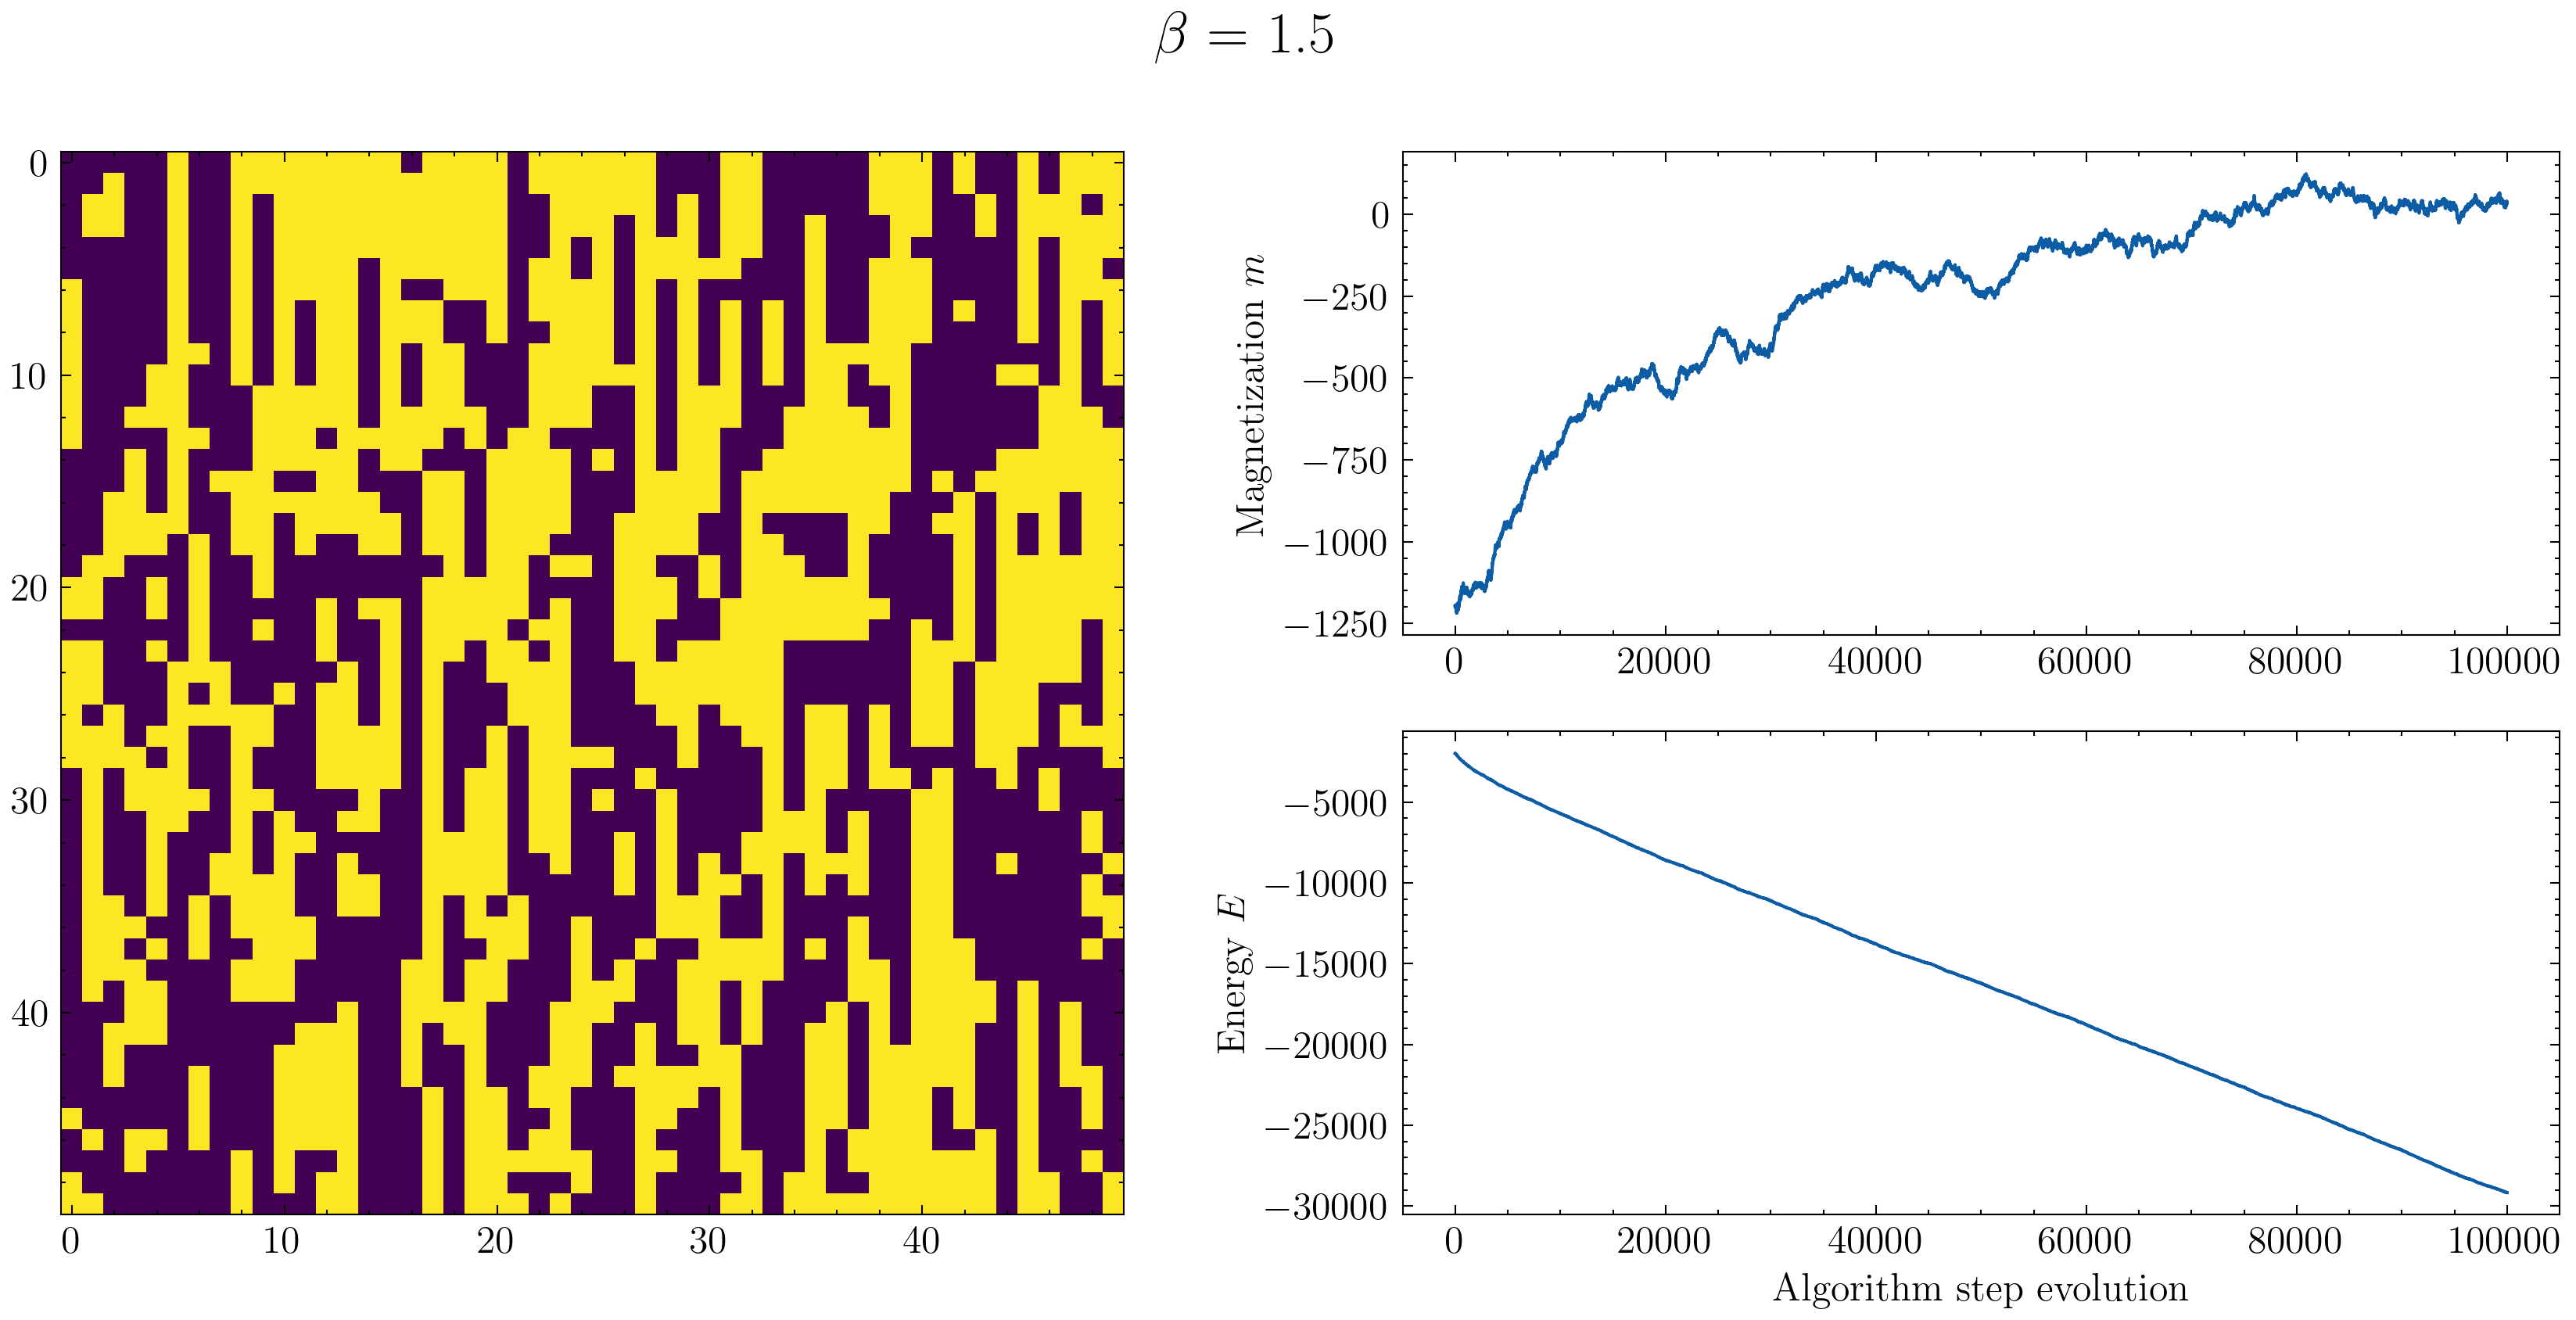

In [112]:
beta = 1.5

spin_matrix, net_spin, net_energy = metropole(spin_lattice, 100000, beta, get_energy(spin_lattice))

fig, ax = plt.subplot_mosaic([['left', 'top_right'], ['left', 'bottom_right']], figsize=(14,6))
fig.suptitle(fr'$\beta$ = {beta}', fontsize=18)

ax['left'].imshow(spin_matrix)

ax['top_right'].plot(net_spin)
ax['top_right'].set_ylabel(r'Magnetization $m$')

ax['bottom_right'].plot(net_energy)
ax['bottom_right'].set_ylabel(r'Energy $E$')
ax['bottom_right'].set_xlabel('Algorithm step evolution')

plt.show()

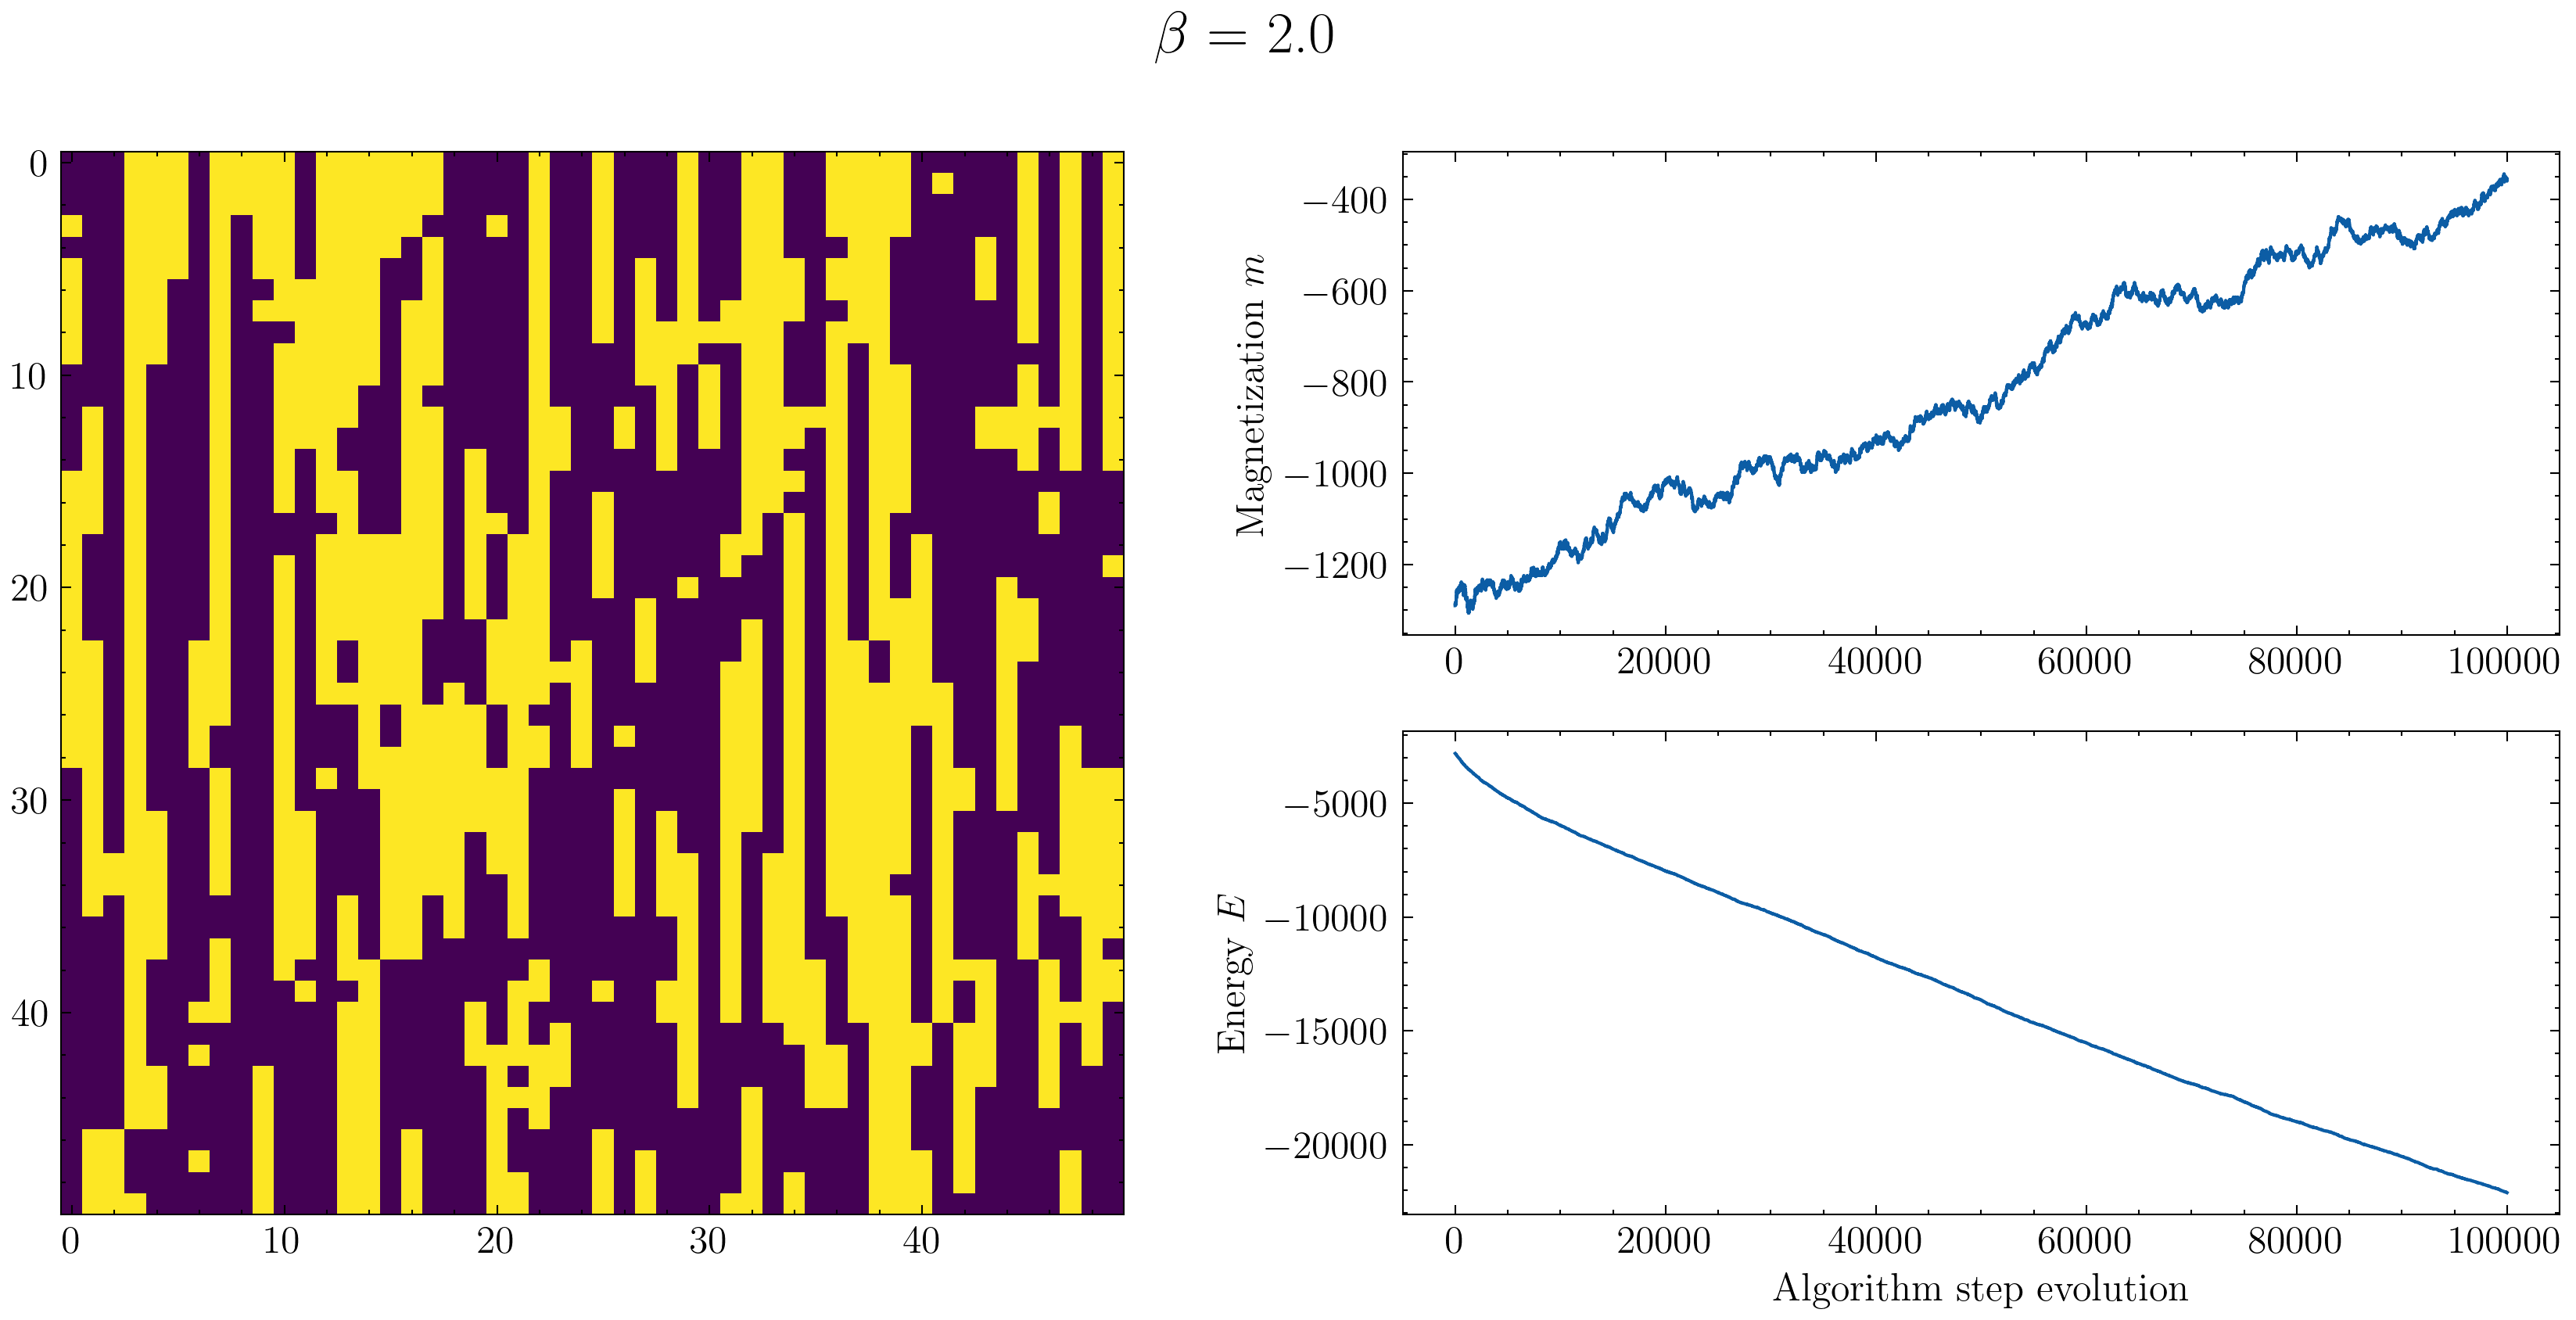

In [114]:
beta = 2.0

spin_matrix, net_spin, net_energy = metropole(spin_lattice, 100000, beta, get_energy(spin_lattice))

fig, ax = plt.subplot_mosaic([['left', 'top_right'], ['left', 'bottom_right']], figsize=(14,6))
fig.suptitle(fr'$\beta$ = {beta}', fontsize=18)

ax['left'].imshow(spin_matrix)

ax['top_right'].plot(net_spin)
ax['top_right'].set_ylabel(r'Magnetization $m$')

ax['bottom_right'].plot(net_energy)
ax['bottom_right'].set_ylabel(r'Energy $E$')
ax['bottom_right'].set_xlabel('Algorithm step evolution')

plt.show()

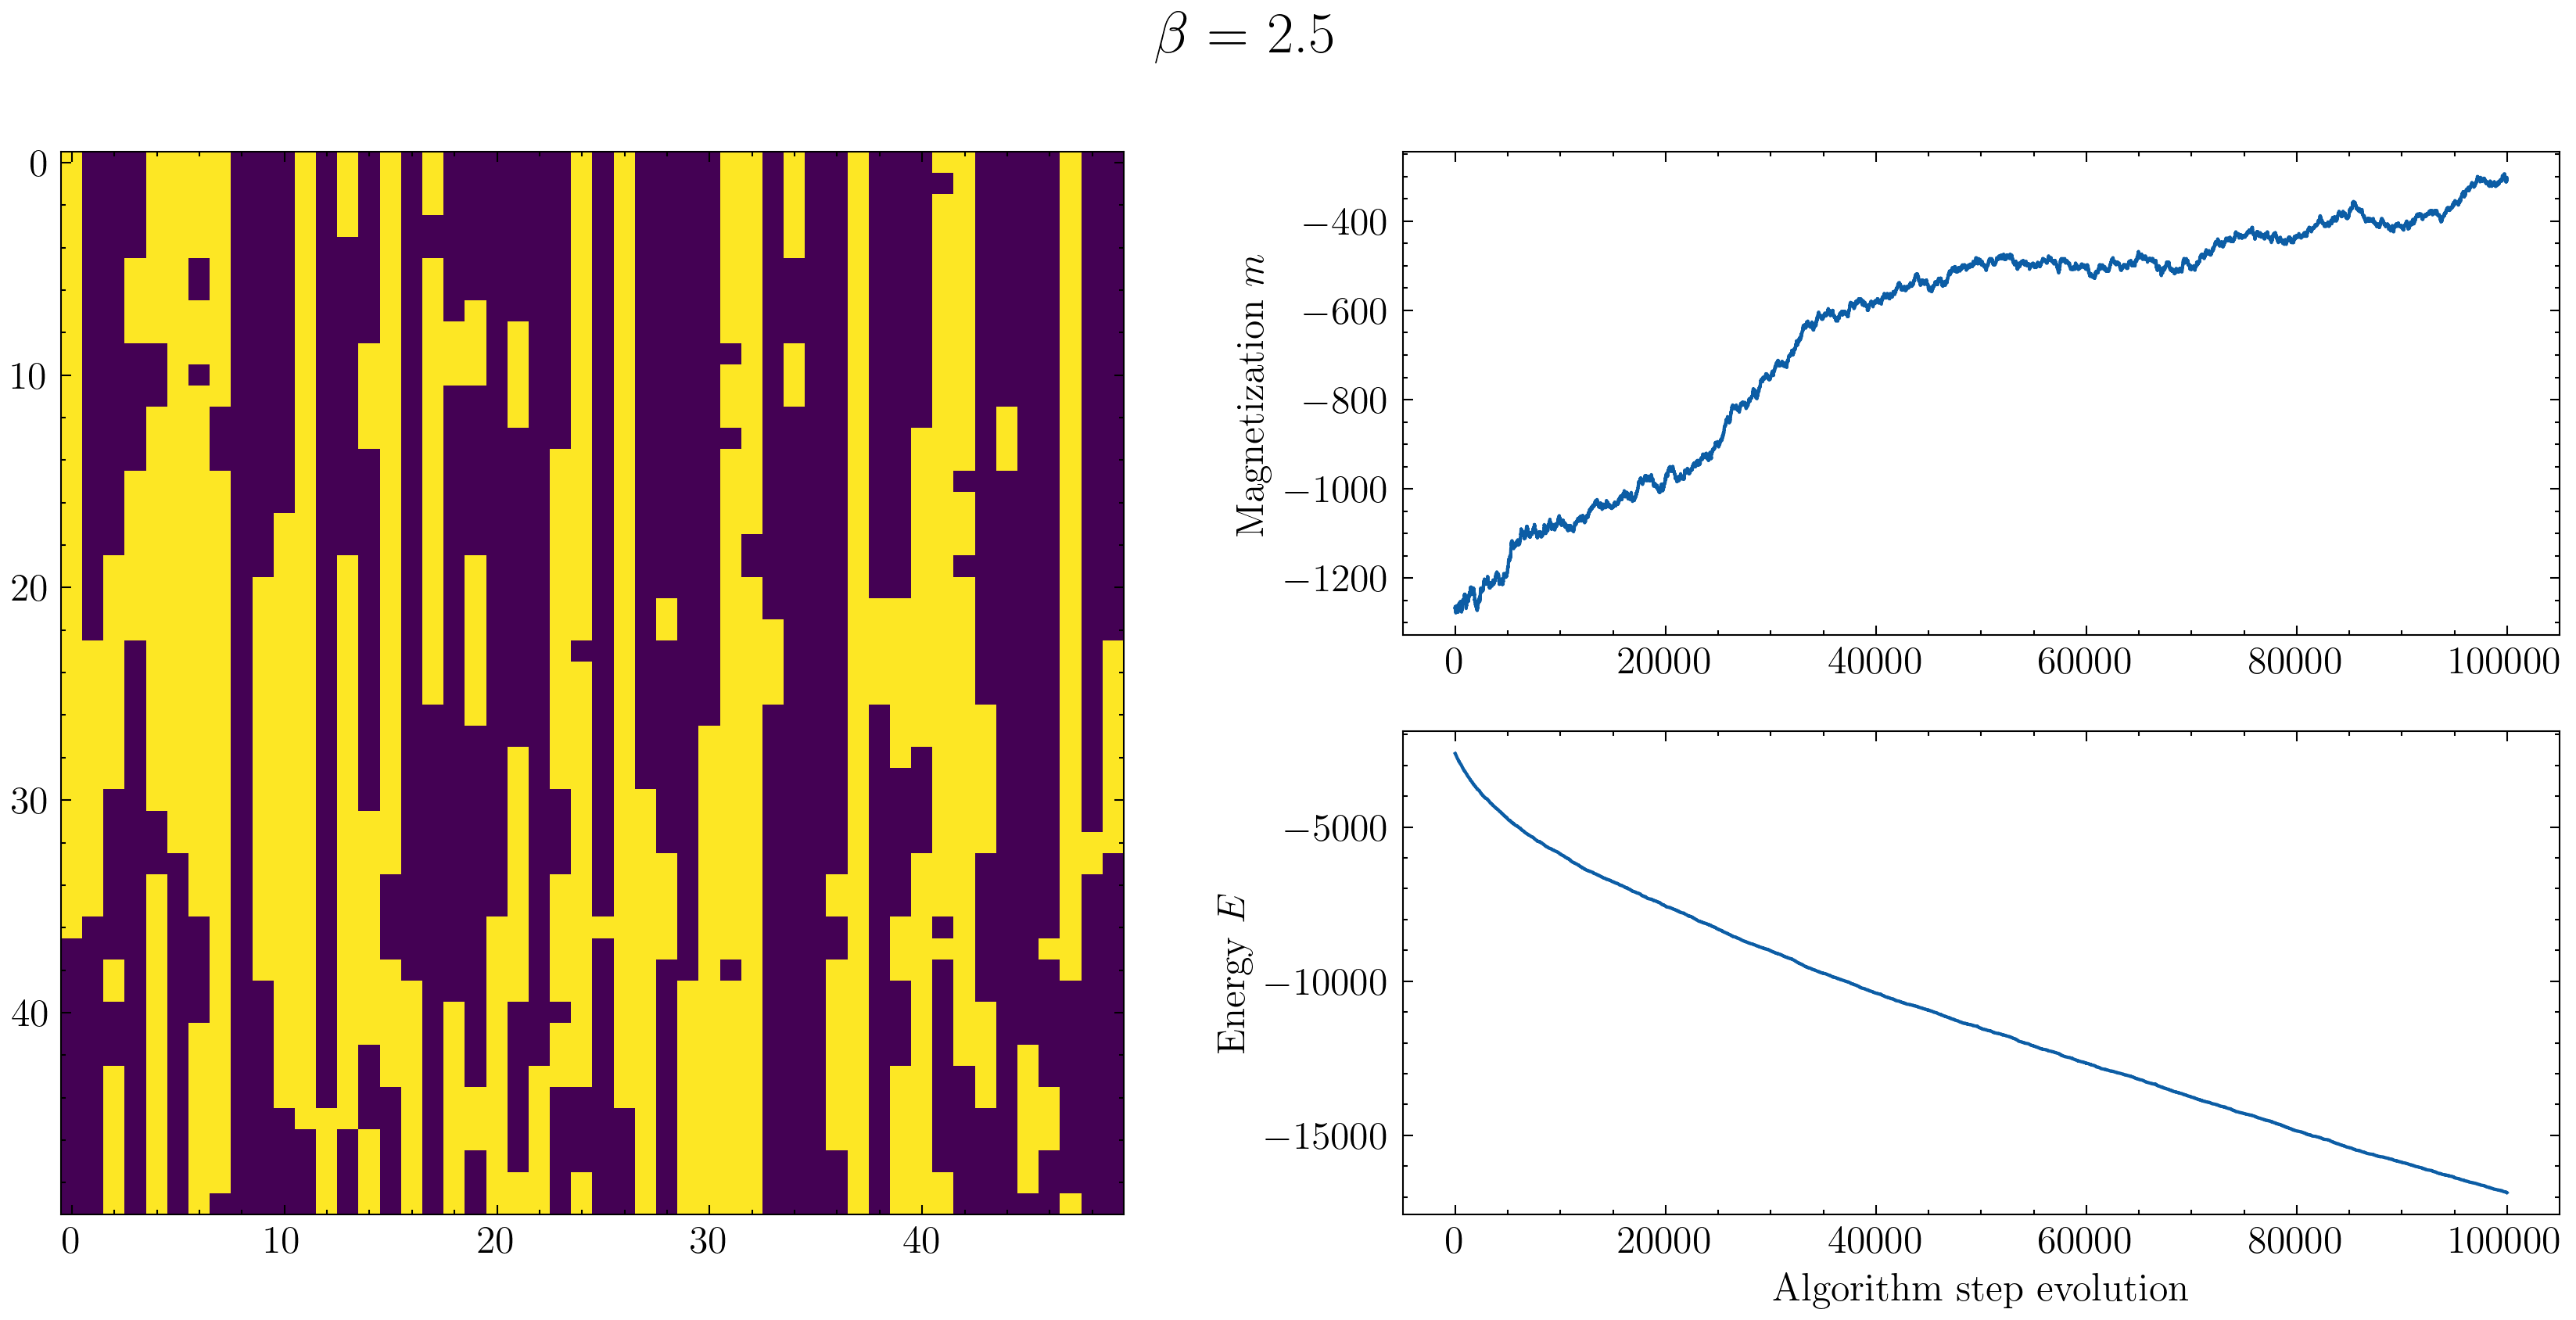

In [116]:
beta = 2.5

spin_matrix, net_spin, net_energy = metropole(spin_lattice, 100000, beta, get_energy(spin_lattice))

fig, ax = plt.subplot_mosaic([['left', 'top_right'], ['left', 'bottom_right']], figsize=(14,6))
fig.suptitle(fr'$\beta$ = {beta}', fontsize=18)

ax['left'].imshow(spin_matrix)

ax['top_right'].plot(net_spin)
ax['top_right'].set_ylabel(r'Magnetization $m$')

ax['bottom_right'].plot(net_energy)
ax['bottom_right'].set_ylabel(r'Energy $E$')
ax['bottom_right'].set_xlabel('Algorithm step evolution')

plt.show()

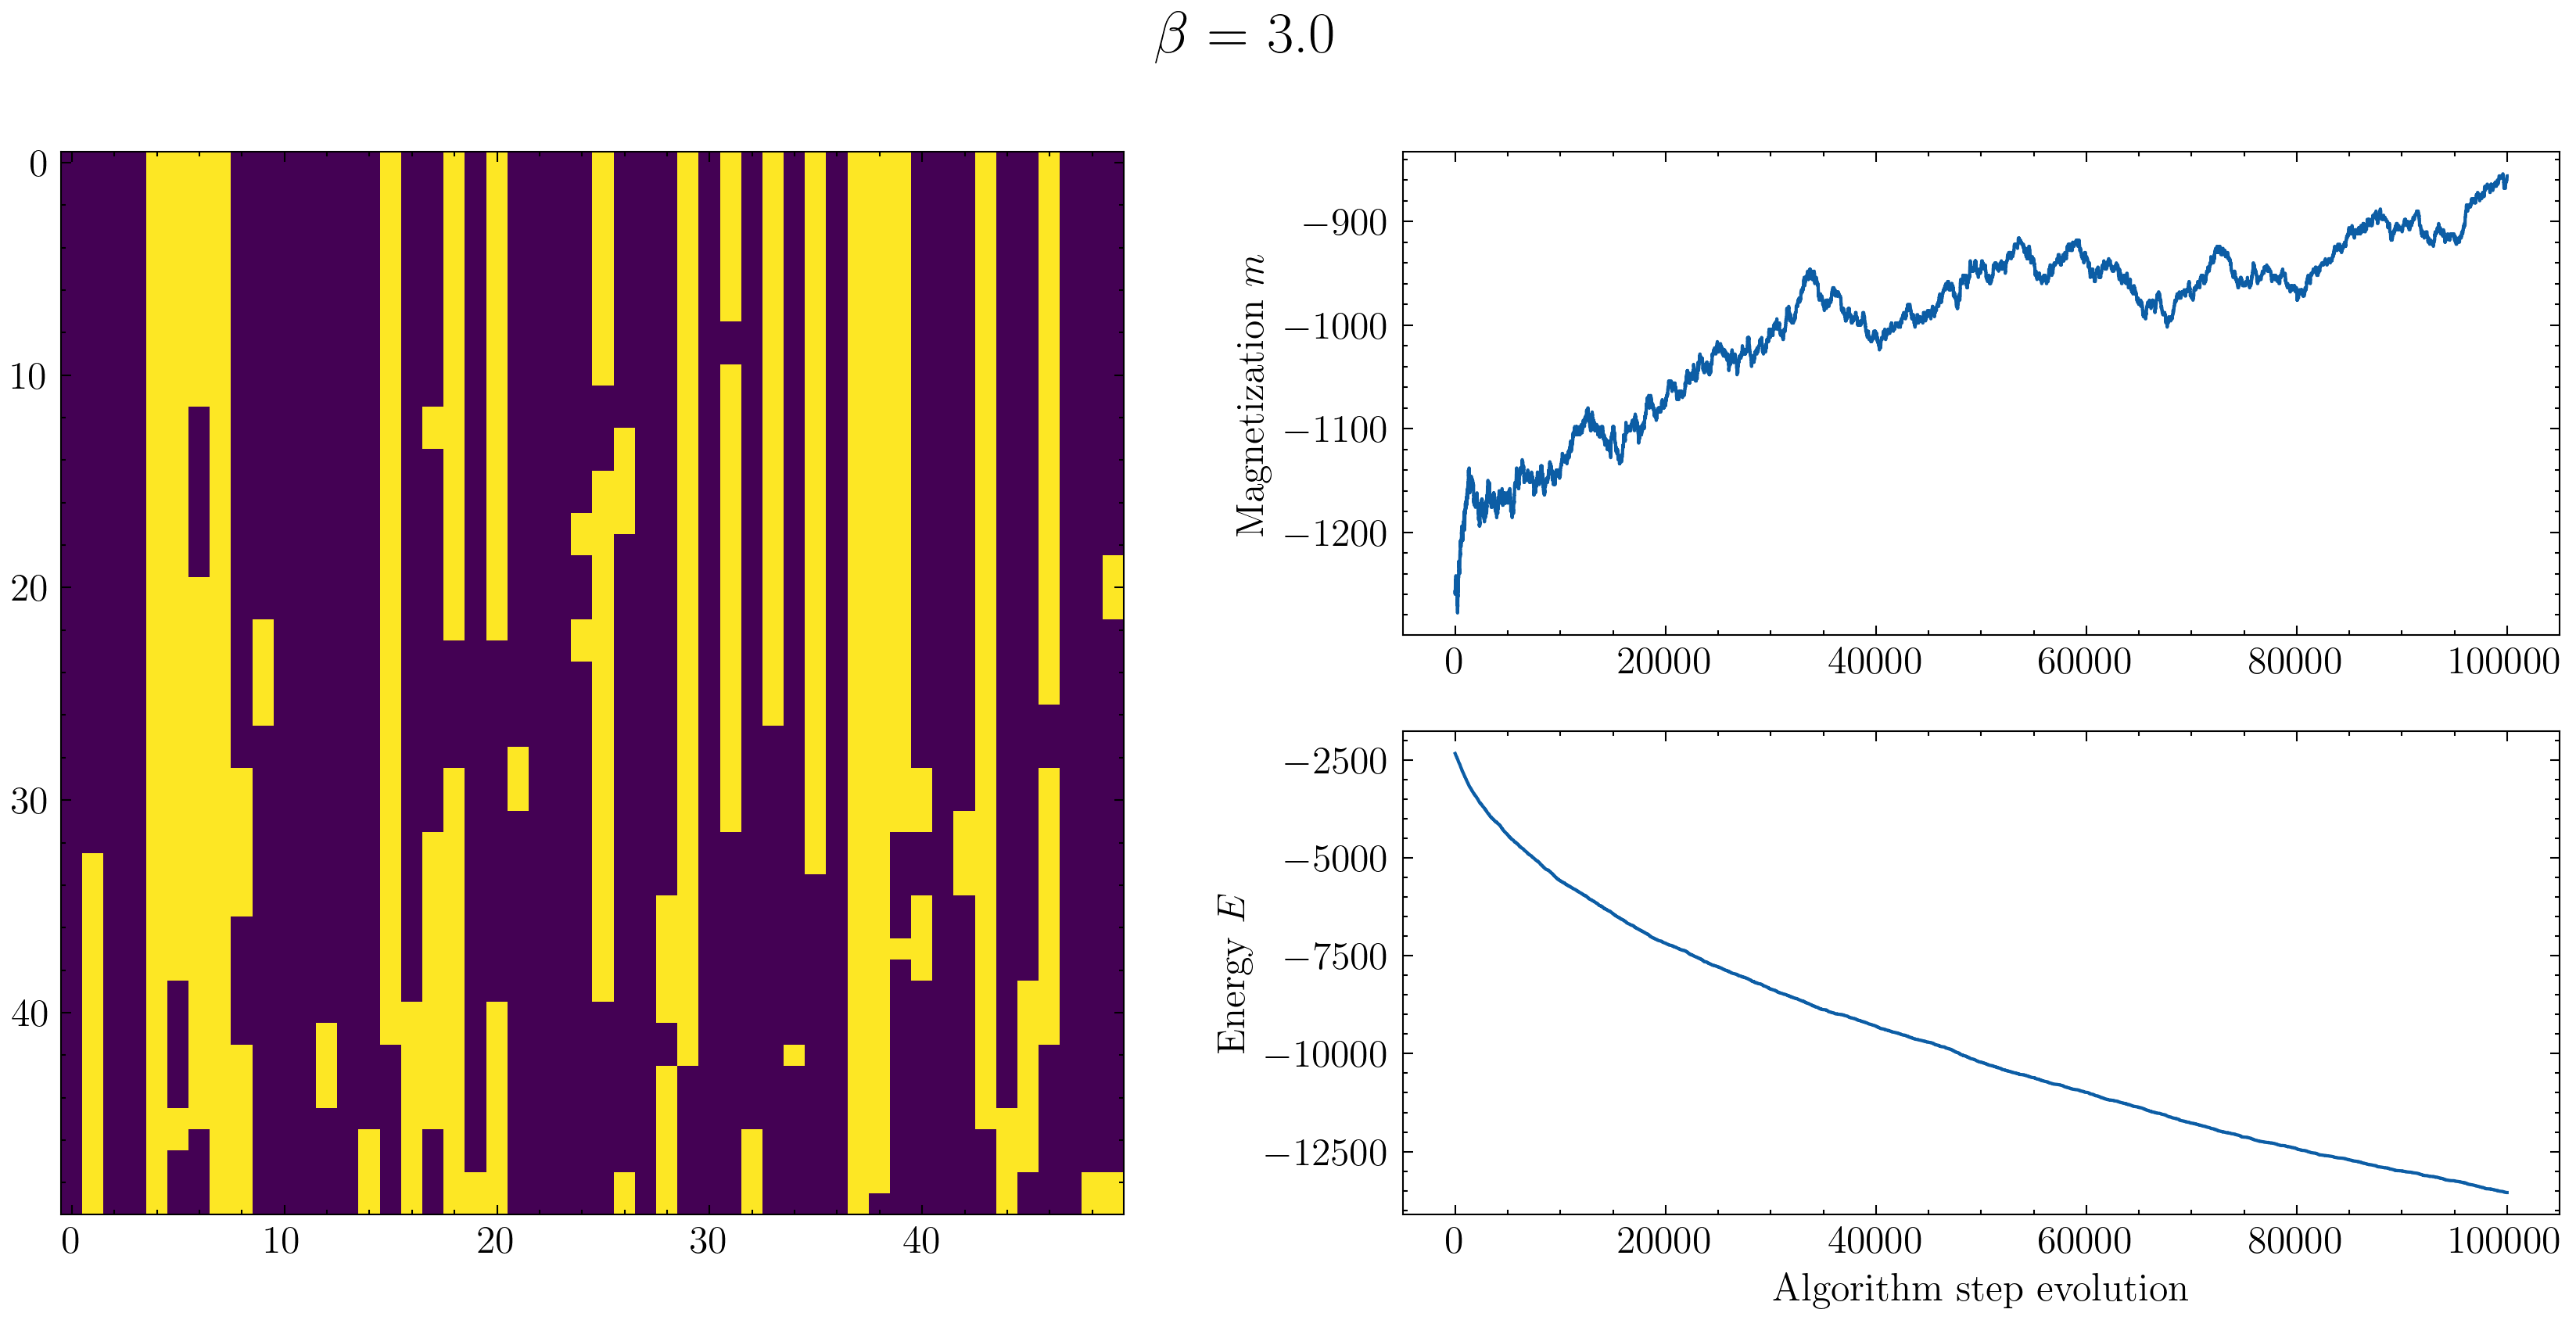

In [118]:
beta = 3.0

spin_matrix, net_spin, net_energy = metropole(spin_lattice, 100000, beta, get_energy(spin_lattice))

fig, ax = plt.subplot_mosaic([['left', 'top_right'], ['left', 'bottom_right']], figsize=(14,6))
fig.suptitle(fr'$\beta$ = {beta}', fontsize=18)

ax['left'].imshow(spin_matrix)

ax['top_right'].plot(net_spin)
ax['top_right'].set_ylabel(r'Magnetization $m$')

ax['bottom_right'].plot(net_energy)
ax['bottom_right'].set_ylabel(r'Energy $E$')
ax['bottom_right'].set_xlabel('Algorithm step evolution')

plt.show()

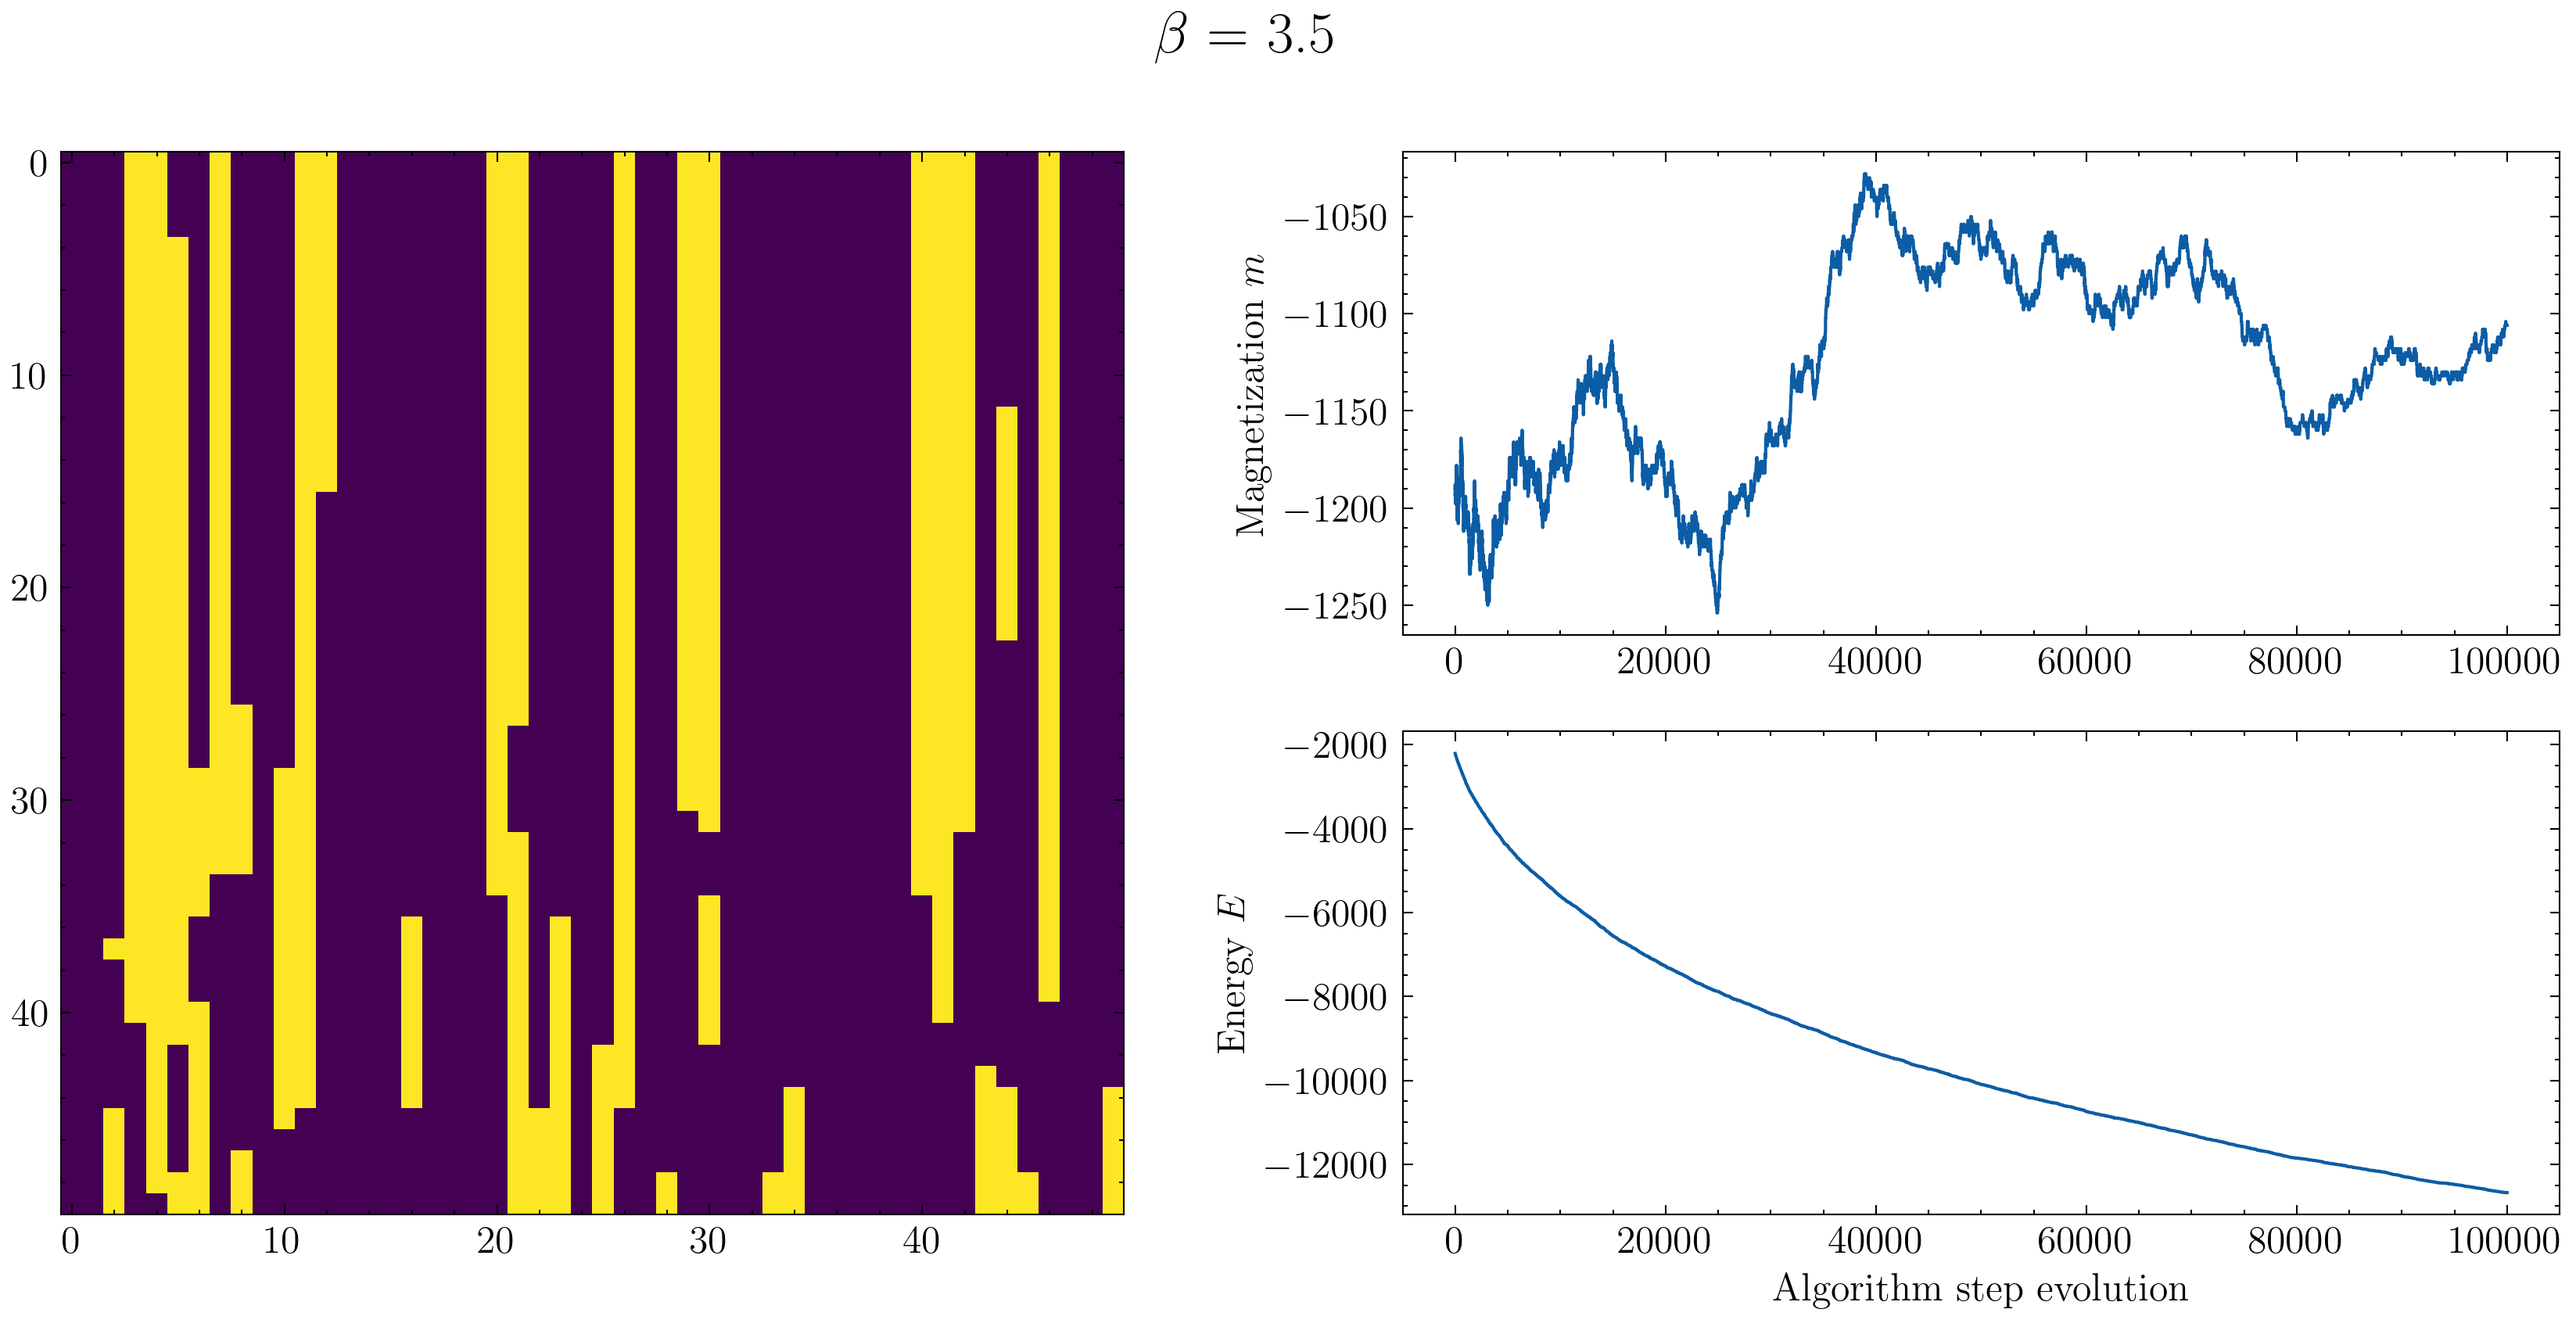

In [120]:
beta = 3.5

spin_matrix, net_spin, net_energy = metropole(spin_lattice, 100000, beta, get_energy(spin_lattice))

fig, ax = plt.subplot_mosaic([['left', 'top_right'], ['left', 'bottom_right']], figsize=(14,6))
fig.suptitle(fr'$\beta$ = {beta}', fontsize=18)

ax['left'].imshow(spin_matrix)

ax['top_right'].plot(net_spin)
ax['top_right'].set_ylabel(r'Magnetization $m$')

ax['bottom_right'].plot(net_energy)
ax['bottom_right'].set_ylabel(r'Energy $E$')
ax['bottom_right'].set_xlabel('Algorithm step evolution')

plt.show()

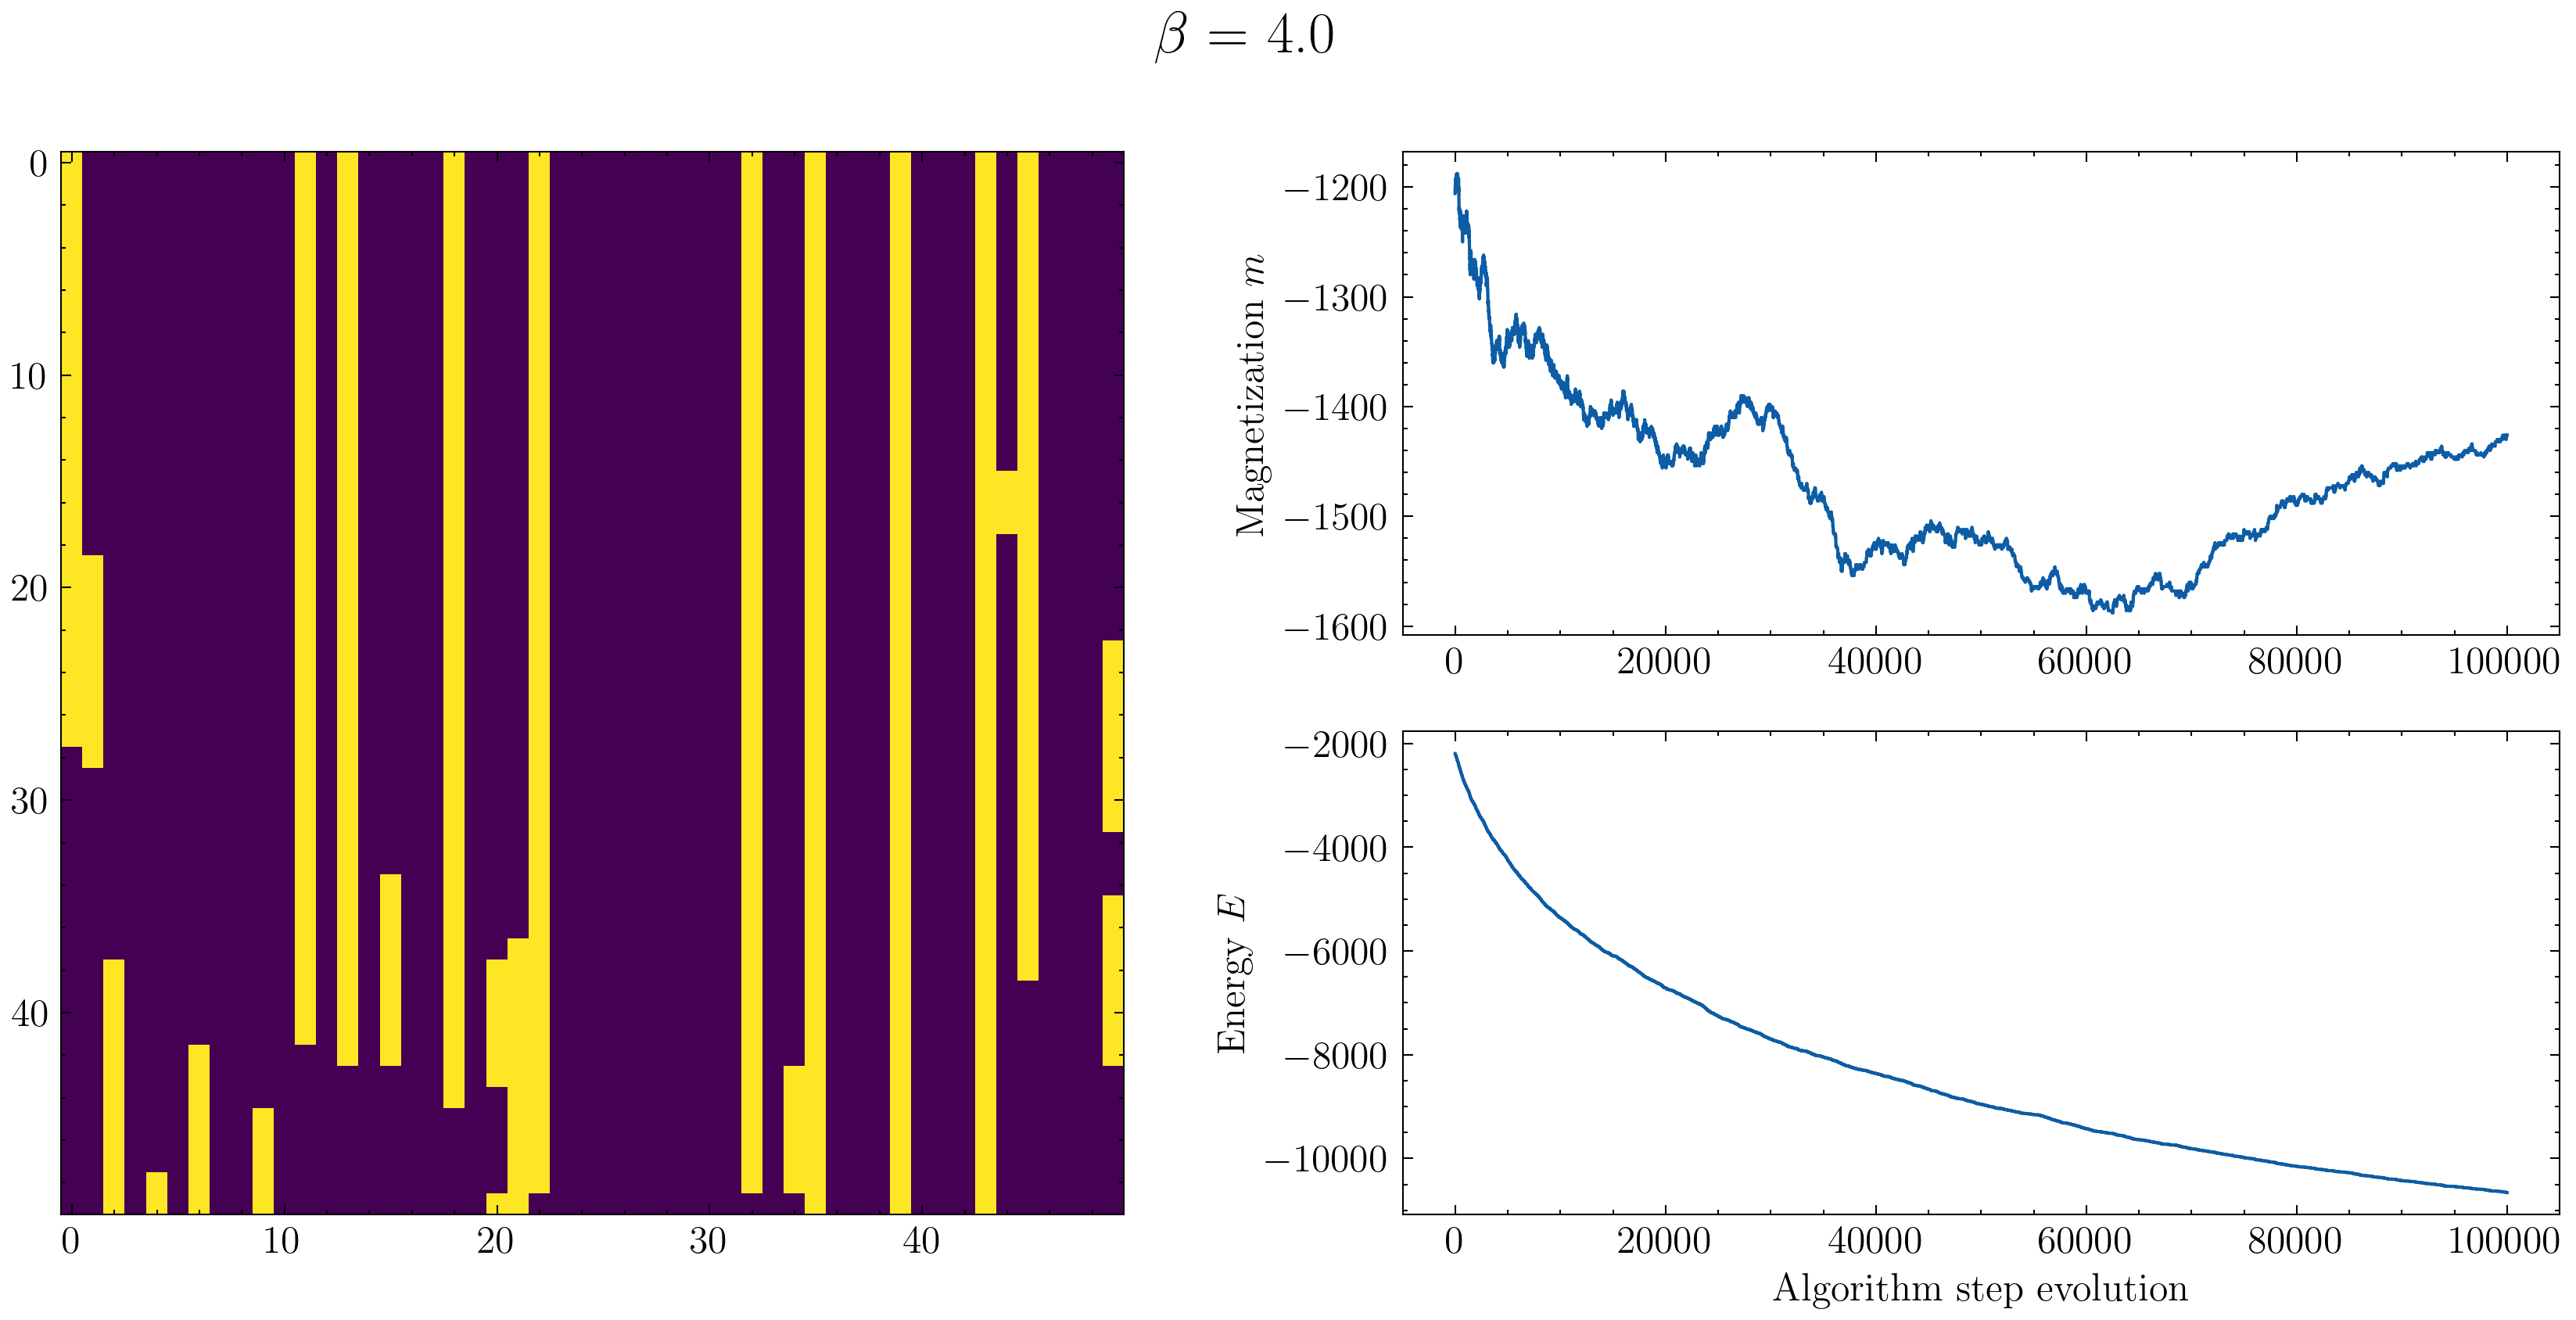

In [122]:
beta = 4.0

spin_matrix, net_spin, net_energy = metropole(spin_lattice, 100000, beta, get_energy(spin_lattice))

fig, ax = plt.subplot_mosaic([['left', 'top_right'], ['left', 'bottom_right']], figsize=(14,6))
fig.suptitle(fr'$\beta$ = {beta}', fontsize=18)

ax['left'].imshow(spin_matrix)

ax['top_right'].plot(net_spin)
ax['top_right'].set_ylabel(r'Magnetization $m$')

ax['bottom_right'].plot(net_energy)
ax['bottom_right'].set_ylabel(r'Energy $E$')
ax['bottom_right'].set_xlabel('Algorithm step evolution')

plt.show()

In [11]:
beta = np.zeros(100)
spin = np.zeros(100)
energy = np.zeros(100)

for t in range(0, 10, 100):
    spin[t], energy[t] = metropole(spin_lattice, 100000, t, get_energy(spin_lattice))
    beta[t] = t